# KMeans Algorithm on Customer Segimentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pylab as pl

In [2]:
data = pd.read_csv('data/Cust_Segmentation.csv')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
Data = data.drop(['Address'], axis = 1)
Data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
Customer Id        850 non-null int64
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [8]:
x = Data.values[:, 1:]
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [11]:
x = np.nan_to_num(x)

In [12]:
from sklearn.preprocessing import StandardScaler
clu = StandardScaler().fit_transform(x)
clu

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [14]:
from sklearn.cluster import KMeans 
clt = KMeans(init = 'k-means++', n_clusters = 2, max_iter = 500)
clt.fit(clu)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
clt.cluster_centers_

array([[-0.26076335, -0.07606245, -0.30786727, -0.34328552, -0.30395517,
        -0.35349778, -0.01082837, -0.1591075 ],
       [ 0.93089713,  0.27153478,  1.09905303,  1.22549239,  1.08508727,
         1.26194908,  0.03865612,  0.56799666]])

In [16]:
clt.inertia_

5194.21493734616

In [22]:
labels = clt.labels_[0:10]

In [23]:
clt.n_clusters

2

In [24]:
predict = clt.predict(clu)
predict[0:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [28]:
Data.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

Text(0.5, 1.0, 'KMeans')

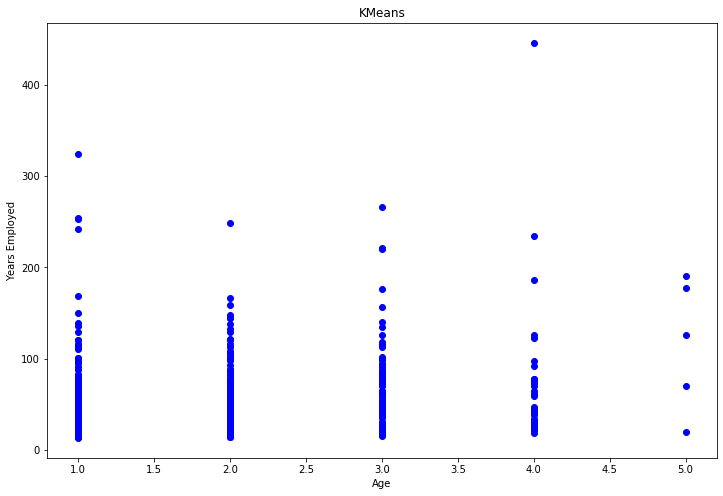

In [29]:
plt.figure(figsize = (12, 8))
plt.scatter(x[:, 1], x[:, 3], marker = 'o', color = 'blue')
plt.xlabel('Age')
plt.ylabel('Years Employed')
plt.title('KMeans')

# DBSCAN Algorithm on CustomerSegimentation

In [43]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 3, min_samples = 8)
db.fit(clu)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [44]:
db.components_

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [45]:
db.core_sample_indices_[0:5]

array([0, 1, 2, 3, 5], dtype=int64)

In [46]:
db.eps

3

In [47]:
db.labels_[:10]

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0], dtype=int64)

In [48]:
db.min_samples

8

# Hierarchial Clustering 

In [52]:
from sklearn.cluster import AgglomerativeClustering
hi = AgglomerativeClustering(n_clusters = 2)
hi.fit(clu)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [53]:
hi.labels_[0:6]

array([0, 1, 0, 0, 1, 1], dtype=int64)

In [54]:
hi.n_clusters

2

In [55]:
hi.linkage

'ward'

In [57]:
hi.n_components_

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_components_`` attribute was deprecated in favor of ``n_connected_components_`` in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)


1

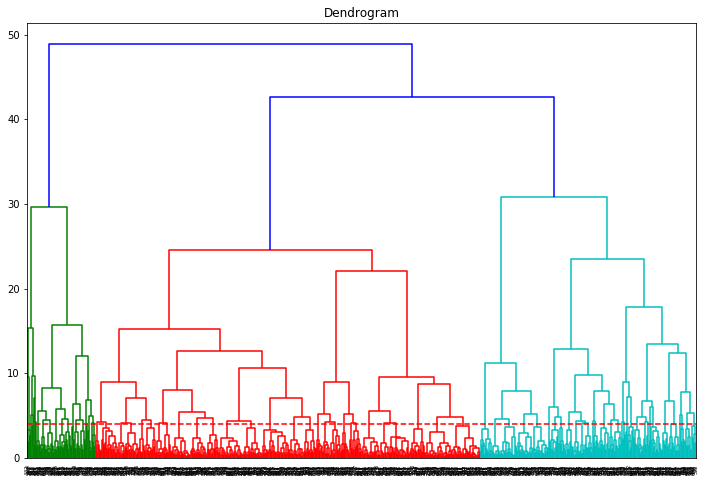

In [60]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize = (12, 8))
plt.title('Dendrogram')
dendo = sc.dendrogram(sc.linkage(clu, method = 'ward'))
plt.axhline(y = 4, color = 'r', linestyle = '--')